In [26]:
%pip install -qq -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip -qq install mlrun s3fs seaborn

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dbt-common 1.10.0 requires protobuf<5.0.0,>=4.0.0, but you have protobuf 3.20.3 which is incompatible.
dbt-core 1.8.8 requires protobuf<5,>=4.0.0, but you have protobuf 3.20.3 which is incompatible.


In [53]:
import pandas as pd
from datasets_tourism import *
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
START_DATE = "2022-01-01"
END_DATE = "2023-12-31"

# Dati Vodafone

**In vodafone data, first find the locId of locations that are relevant for the "Molveno" use case**
- LAGO_MOLV Lago di Molveno
- 27        Molveno
- 166       Andalo
- 105       Altopiano Paganella ecc..

In [26]:
locId_LAGO_MOLVENO = "LAGO_MOLV"
locId_MOLVENO = "27"
locId_ANDALO = "166"
locID_ALTOPIANO_APT = "105" # Altopiano della Paganella, Rotaliana e San Lorenzo Dorsino

In [33]:
vodafone_lagomolveno = vodafone_attendences_ALL_df[
    (vodafone_attendences_ALL_df["locId"] == locId_LAGO_MOLVENO) & 
    (vodafone_attendences_ALL_df["date"] >= START_DATE) &
    (vodafone_attendences_ALL_df["date"] <= END_DATE)
]
vodafone_andalo = vodafone_attendences_ALL_df[
    (vodafone_attendences_ALL_df["locId"] == locId_ANDALO) &
    (vodafone_attendences_ALL_df["date"] >= START_DATE) &
    (vodafone_attendences_ALL_df["date"] <= END_DATE)
]
vodafone_apt = vodafone_attendences_ALL_df[
    (vodafone_attendences_ALL_df["locId"] == locID_ALTOPIANO_APT) &
    (vodafone_attendences_ALL_df["date"] >= START_DATE) &
    (vodafone_attendences_ALL_df["date"] <= END_DATE)
]

In [34]:
vodafone_apt

,date,locType,locId,userCountry,userProfile,userCluster,value
4621,2022-01-01,TN_MKT_AM_22,105,ALB,TOURIST,None,115
4622,2022-01-01,TN_MKT_AM_22,105,ALB,VISITOR,None,0
4623,2022-01-01,TN_MKT_AM_22,105,ARE,VISITOR,None,0
4624,2022-01-01,TN_MKT_AM_22,105,ARG,TOURIST,None,0
4625,2022-01-01,TN_MKT_AM_22,105,AUS,VISITOR,None,0
...,...,...,...,...,...,...,...
4855006,2023-12-30,TN_MKT_AM_22,105,STR,TOURIST,STR,2742
4855007,2023-12-30,TN_MKT_AM_22,105,STR,VISITOR,STR,869
4855386,2023-12-31,TN_MKT_AM_22,105,STR,COMMUTER,STR,38
4855387,2023-12-31,TN_MKT_AM_22,105,STR,TOURIST,STR,2644


In [35]:
vodafone_apt_tourists = vodafone_apt[vodafone_apt["userProfile"] == "TOURIST"].groupby("date").sum().reset_index()[["date", "value"]]

In [82]:
vodafone_apt_tourists["date"] = pd.to_datetime(vodafone_apt_tourists["date"])
vodafone_apt_tourists.dtypes

date     datetime64[ns]
value             int64
dtype: object

# Movimento turistico APT

In [83]:
movimento_turistico_df.dtypes

giorno             datetime64[us]
ente_promozione            object
arrivi                      int64
presenze                    int64
dtype: object

In [84]:
movimento_turistico_df

,giorno,ente_promozione,arrivi,presenze
0,2022-01-01,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",1191,9433
1,2022-01-02,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",5381,8585
2,2022-01-03,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",1619,8712
3,2022-01-04,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",847,8534
4,2022-01-05,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",1297,8464
...,...,...,...,...
725,2023-12-27,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",2537,8765
726,2023-12-28,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",1604,9418
727,2023-12-29,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",1904,9996
728,2023-12-30,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",2911,10525


In [93]:
concat_df = pd.concat([vodafone_apt_tourists.set_index("date"), movimento_turistico_df.set_index("giorno")], axis=1).reset_index()
concat_df

,index,value,ente_promozione,arrivi,presenze
0,2022-01-01,20990,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",1191,9433
1,2022-01-02,21809,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",5381,8585
2,2022-01-03,17891,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",1619,8712
3,2022-01-04,17117,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",847,8534
4,2022-01-05,16830,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",1297,8464
...,...,...,...,...,...
725,2023-12-27,16482,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",2537,8765
726,2023-12-28,17971,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",1604,9418
727,2023-12-29,19553,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",1904,9996
728,2023-12-30,21372,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",2911,10525


In [100]:
concat_df = pd.concat([vodafone_apt_tourists.set_index("date"), movimento_turistico_df.set_index("giorno")], axis=1).reset_index()
concat_df = concat_df[["index", "value", "presenze"]].rename(columns={"value": "value_vodafone", "presenze": "presenze_turistiche", "index": "date"})
concat_df

,date,value_vodafone,presenze_turistiche
0,2022-01-01,20990,9433
1,2022-01-02,21809,8585
2,2022-01-03,17891,8712
3,2022-01-04,17117,8534
4,2022-01-05,16830,8464
...,...,...,...
725,2023-12-27,16482,8765
726,2023-12-28,17971,9418
727,2023-12-29,19553,9996
728,2023-12-30,21372,10525


<Axes: xlabel='value', ylabel='Count'>

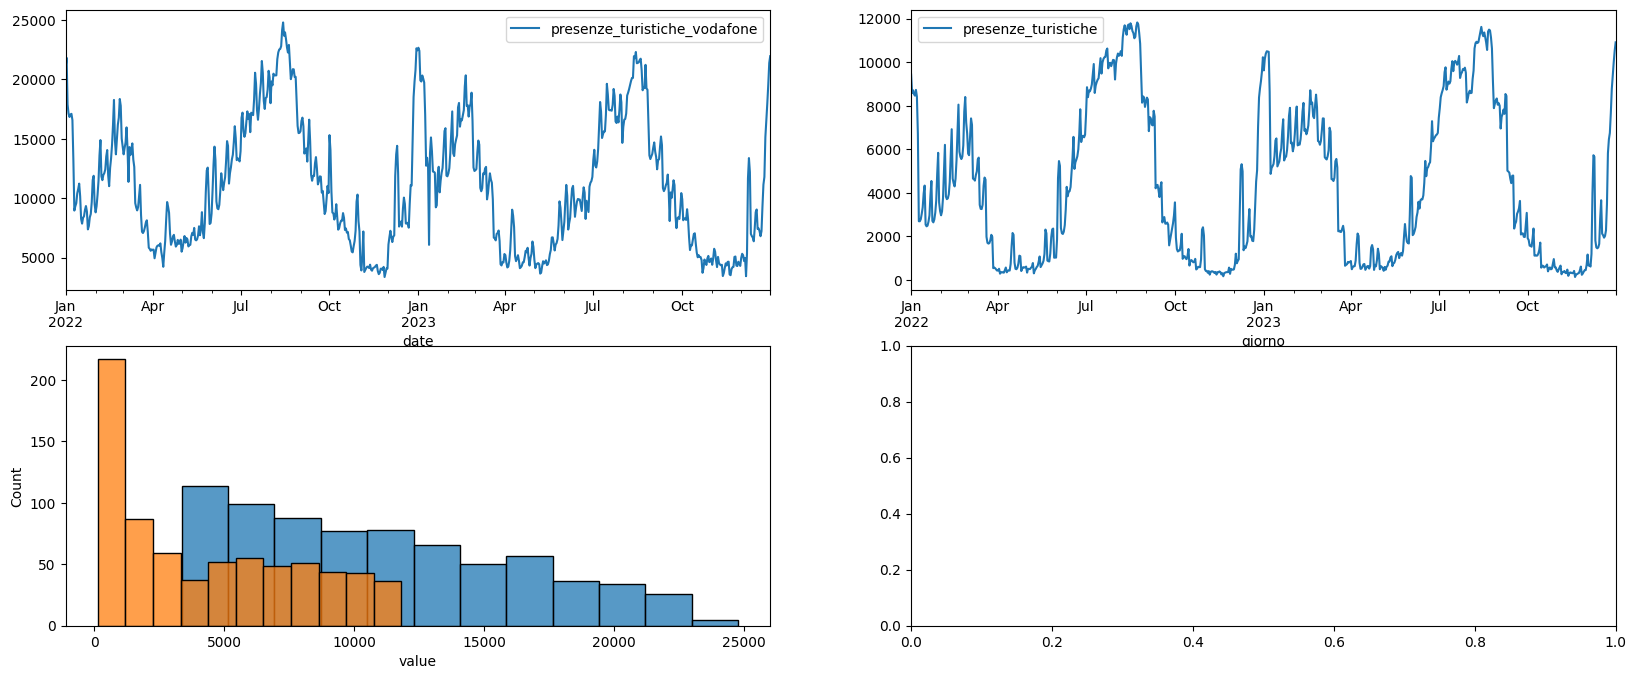

In [101]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
vodafone_apt_tourists.plot(x="date", y="value", label="presenze_turistiche_vodafone", ax=axes[0, 0])
movimento_turistico_df.plot(y="presenze", x="giorno", label="presenze_turistiche", ax=axes[0, 1])
sns.histplot(vodafone_apt_tourists, x="value", ax=axes[1, 0])
sns.histplot(movimento_turistico_df, x="presenze", ax=axes[1, 0])

<Axes: xlabel='date'>

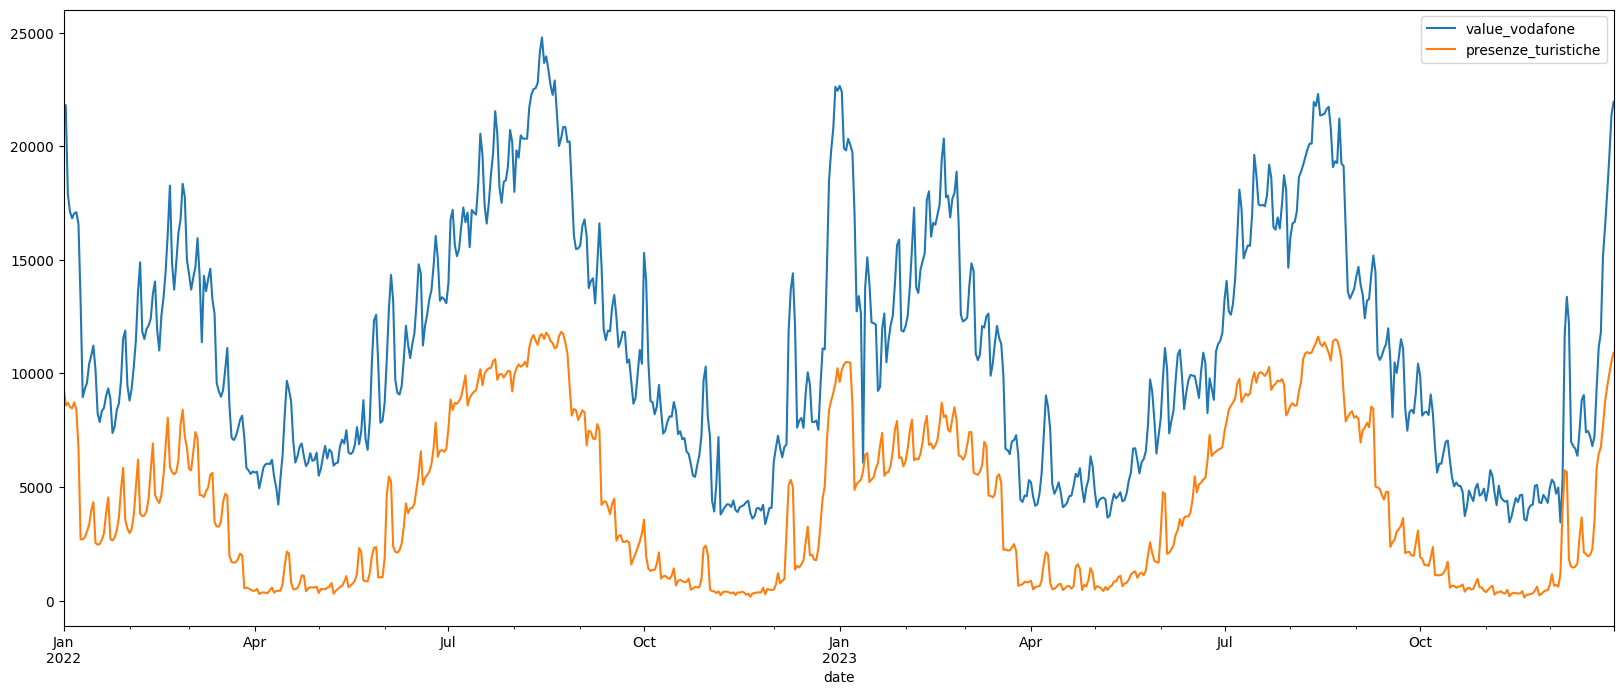

In [103]:
concat_df.plot(x="date", figsize=(20, 8))

In [88]:
movimento_turistico_df.describe()

,giorno,arrivi,presenze
count,730,730.000000,730.000000
mean,2022-12-31 12:00:00,1066.556164,4352.626027
min,2022-01-01 00:00:00,28.000000,137.000000
25%,2022-07-02 06:00:00,291.250000,883.500000
50%,2022-12-31 12:00:00,791.000000,3414.000000
75%,2023-07-01 18:00:00,1406.000000,7422.750000
max,2023-12-31 00:00:00,6236.000000,11826.000000
std,NaN,1018.508473,3572.490345


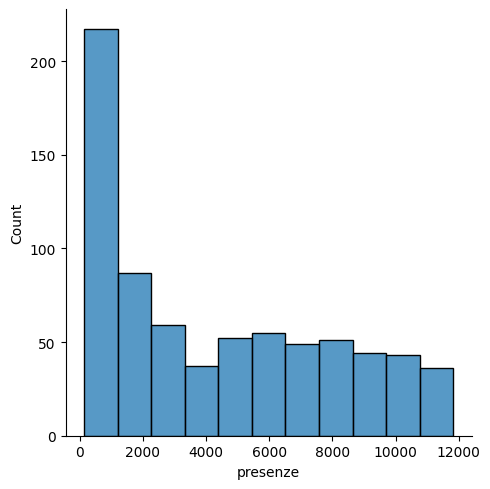

In [87]:
sns.displot(movimento_turistico_df, x="presenze")

In [90]:
vodafone_apt_tourists.describe()

,date,value
count,730,730.000000
mean,2022-12-31 12:00:00,11010.524658
min,2022-01-01 00:00:00,3370.000000
25%,2022-07-02 06:00:00,6462.750000
50%,2022-12-31 12:00:00,10185.500000
75%,2023-07-01 18:00:00,14835.250000
max,2023-12-31 00:00:00,24785.000000
std,NaN,5298.739984


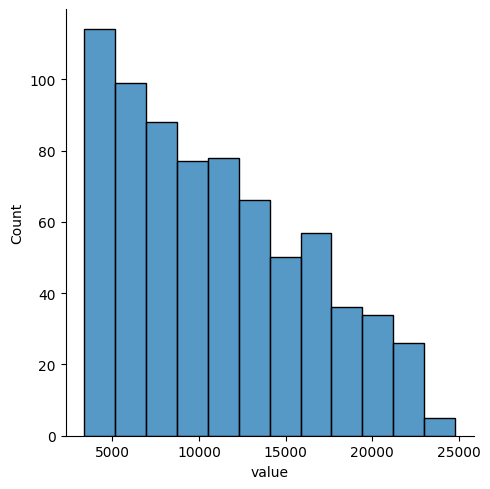

In [72]:
sns.displot(vodafone_apt_tourists, x="value")

# Movimento turistico Molveno

In [23]:
movimento_turistico_molveno_df

,anno,mese,date,territorio_comunale,arrivi,presenze
0,2022,01,2022-01-01,MOLVENO,303,2102
1,2022,01,2022-01-02,MOLVENO,829,1783
2,2022,01,2022-01-03,MOLVENO,479,1787
3,2022,01,2022-01-04,MOLVENO,209,1748
4,2022,01,2022-01-05,MOLVENO,320,1649
...,...,...,...,...,...,...
725,2023,12,2023-12-27,MOLVENO,606,1494
726,2023,12,2023-12-28,MOLVENO,581,1802
727,2023,12,2023-12-29,MOLVENO,725,2138
728,2023,12,2023-12-30,MOLVENO,855,2371
